# Apache Airflow

In [1]:
!pip install -q apache-airflow

     |████████████████████████████████| 5.3 MB 4.3 MB/s 
     |████████████████████████████████| 155 kB 65.0 MB/s 
     |████████████████████████████████| 164 kB 72.7 MB/s 
     |████████████████████████████████| 3.0 MB 47.6 MB/s 
     |████████████████████████████████| 77 kB 5.1 MB/s 
     |████████████████████████████████| 1.8 MB 47.1 MB/s 
     |████████████████████████████████| 548 kB 75.7 MB/s 
     |████████████████████████████████| 209 kB 76.1 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 111 kB 58.4 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 79 kB 8.8 MB/s 
     |████████████████████████████████| 3.8 MB 63.2 MB/s 
     |████████████████████████████████| 636 kB 65.1 MB/s 
     |████████████████████████████████| 133 kB 78.1 MB/s 
     |████████████████████████████████| 75 kB 4.3 MB/s 
     |█████████████████████

Airflow uses a relational database as a backend to store configuration data. By default, this is a SQLite database, which will be stored in ~/airflow/airflow.db. You initialize the database in your environment by running the following command in the terminal:

In [2]:
!airflow db init

DB: sqlite:////root/airflow/airflow.db
[2021-08-26 16:53:10,743] {db.py:702} INFO - Creating tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144 UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
INFO  [alembic.runtime.migration] Running upgrade  -> e3a246e0dc1, current schema
INFO  [alembic.runtime.migration] Running upgrade e3a246e0dc1 -> 1507a7289a2f, create is_encrypted
/usr/local/lib/python3.7/dist-packages/alembic/ddl/sqlite.py:44 UserWarning: Skipping unsupported ALTER for creation of implicit constraintPlease refer to the batch mode feature which allows for SQLite migrations using a copy-and-move strategy.
INFO  [alembic.runtime.migrati

Next, you need to create a user that can log into the Airflow UI. Enter the following in your terminal to create a user named admin with admin permissions:

In [3]:
!airflow users create \
    --username admin \
    --firstname Firstname \
    --lastname Lastname \
    --role Admin \
    --email admin@example.org \
    --password password

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144 UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
[2021-08-26 16:53:27,385] {manager.py:788} WARNING - No user yet created, use flask fab command to do it.
Admin user admin created


To confirm that the configuration works correctly, you can run the Airflow web server and scheduler and log into the UI. Execute the following commands in the terminal to start the web server and scheduler:

In [7]:
!airflow webserver --port 8080 -D

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144 UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  ____________       _____________
 ____    |__( )_________  __/__  /________      __
____  /| |_  /__  ___/_  /_ __  /_  __ \_ | /| / /
___  ___ |  / _  /   _  __/ _  / / /_/ /_ |/ |/ /
 _/_/  |_/_/  /_/    /_/    /_/  \____/____/|__/
[2021-08-26 16:45:39,777] {dagbag.py:496} INFO - Filling up the DagBag from /dev/null
Running the Gunicorn Server with:
Workers: 4 sync
Host: 0.0.0.0:8080
Timeout: 120
Logfiles: - -
Access Logformat: 


In [4]:
!nohup airflow scheduler &
!cat nohup.out

In [ ]:
# !airflow config list
# %env AIRFLOW__API__AUTH_BACKEND=airflow.api.auth.backend.basic_auth
# %env AIRFLOW__API__AUTH_BACKEND=airflow.api.auth.backend.default
# !airflow config get-value api auth_backend
# %env AIRFLOW__API__ENABLE_EXPERIMENTAL_API=True
# %env AIRFLOW__API__AUTH_BACKEND=airflow.api.auth.backend.default
# %env AIRFLOW__WEBSERVER__RBAC=False
# %env AIRFLOW__WEBSERVER__AUTHENTICATE=False

### Create a new Airflow DAG

In [6]:
!mkdir -p airflow_demo/dags

You will now add some Python code to create a minimal definition for a DAG called airflow_demo with two basic Bash tasks:

- t0: Runs echo to print some output.
- t1: Runs sleep for 5 seconds, then prints the date.

In [7]:
%%writefile ./airflow_demo/dags/dag.py
from airflow import DAG
from airflow.operators.bash import BashOperator
from datetime import datetime

# Default settings applied to all tasks
default_args = {
    'owner': 'airflow',
    'depends_on_past': False,
    'email_on_failure': False,
    'email_on_retry': False,
    'retries': 0,
    'catchup': False,
    'start_date': datetime(2021, 1, 1)
}

with DAG(
    dag_id='airflow_demo_dag',
    description='An example Airflow DAG',
    schedule_interval=None,
    default_args=default_args
    ) as dag:

    t0 = BashOperator(
        task_id='bash_task_0',
        bash_command='echo "Hi there, this is the first Airflow task!"'
    )

    t1 = BashOperator(
        task_id='bash_task_1',
        bash_command='echo "Sleeping..." && sleep 5s && date'
    )

    t0 >> t1

Writing ./airflow_demo/dags/dag.py


In [8]:
!python ./airflow_demo/dags/dag.py

This will check for Python syntax errors in the file. If successful, there will be no output. Once you have confirmed that the file is error-free, proceed to the next step.

### Run the DAG

In order for the Airflow scheduler to find the new DAG file, you need to modify the configuration file.

In [13]:
%env AIRFLOW__CORE__DAGS_FOLDER=/content/airflow_demo/dags
!airflow config get-value core dags_folder

env: AIRFLOW__CORE__DAGS_FOLDER=/content/airflow_demo/dags
/content/airflow_demo/dags


In [14]:
!airflow dags list

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144 UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
dag_id                        | filepath                      | owner   | paused
==============================+===============================+=========+=======
airflow_demo_dag              | dag.py                        | airflow | None  
example_bash_operator         | /usr/local/lib/python3.7/dist | airflow | True  
                              | -packages/airflow/example_dag |         |       
                              | s/example_bash_operator.py    |         |       
example_branch_datetime_opera | /usr/local/lib/python3.7/dist | airflow | True  
tor_2                         | -packages/airflow/example_dag |         |       
                              | s/ex

Finally, in order to run the new DAG, you will need to reinitialize the Airflow database in order for it to pick up the new DAG. Execute the following command in the terminal:

In [15]:
!airflow db init

DB: sqlite:////root/airflow/airflow.db
[2021-08-26 17:02:33,861] {db.py:702} INFO - Creating tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144 UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
WARNI [airflow.models.crypto] empty cryptography key - values will not be stored encrypted.
WARNI [unusual_prefix_569ff5bff83f584bb19ea58703f6c868cf54df8b_example_kubernetes_executor_config] Could not import DAGs in example_kubernetes_executor_config.py: No module named 'kubernetes'
WARNI [unusual_prefix_569ff5bff83f584bb19ea58703f6c868cf54df8b_example_kubernetes_executor_config] Install kubernetes dependencies with: pip install apache-airflow['cncf.ku

In general use, you can skip this step when the scheduler is running and picks up the DAG at a pre-defined interval, but in this example, we manually reinitialize the database.

Then trigger the DAG run:

In [16]:
!airflow dags trigger airflow_demo_dag

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144 UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
[2021-08-26 17:03:16,803] {__init__.py:38} INFO - Loaded API auth backend: <module 'airflow.api.auth.backend.deny_all' from '/usr/local/lib/python3.7/dist-packages/airflow/api/auth/backend/deny_all.py'>
Created <DagRun airflow_demo_dag @ 2021-08-26 17:03:16+00:00: manual__2021-08-26T17:03:16+00:00, externally triggered: True>


This will run your new DAG and will show the output of the echo statement and the date output in the terminal.

### UI

> Note: Not worked in colab but image snips from 3rd party run

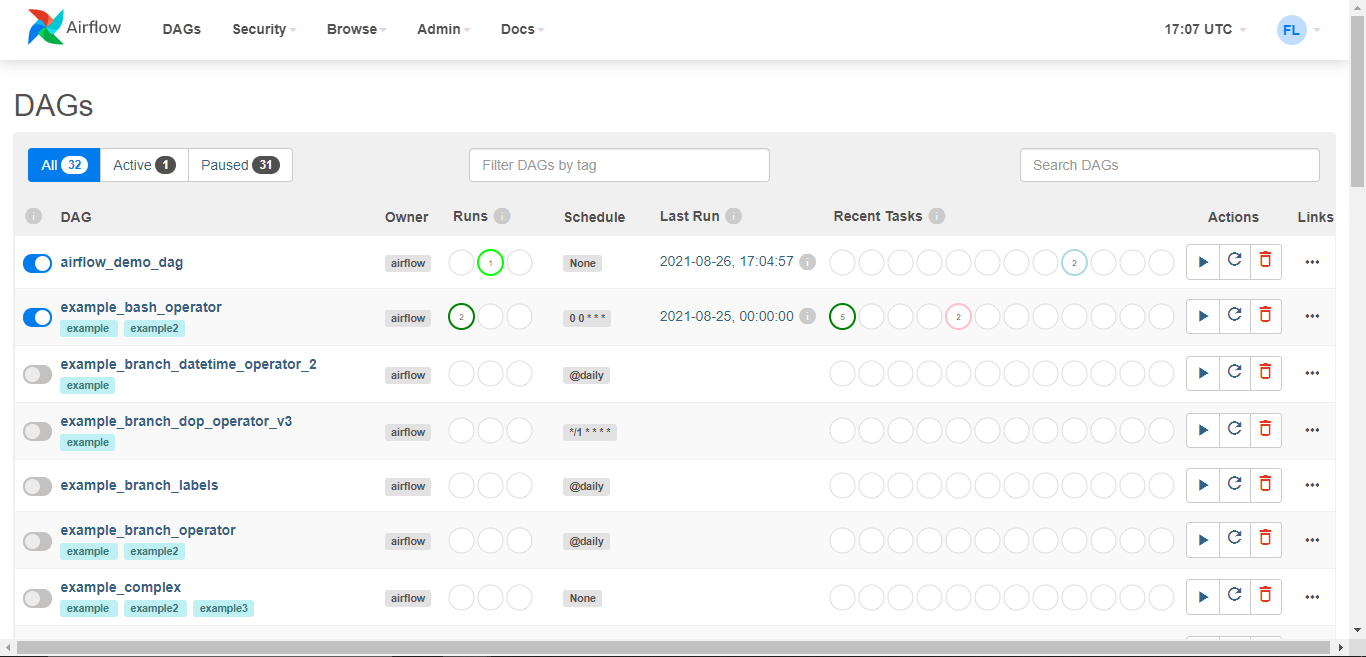

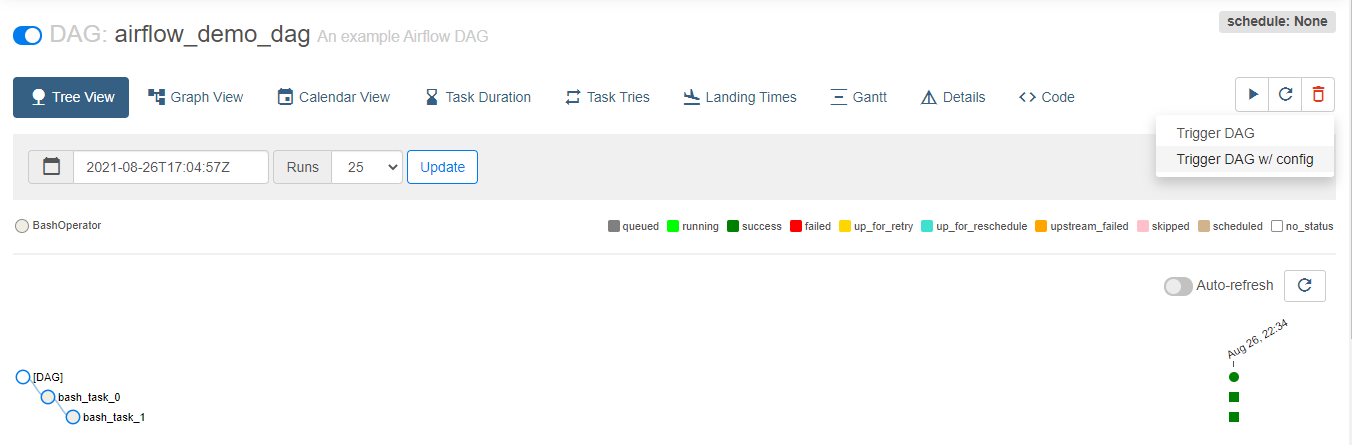

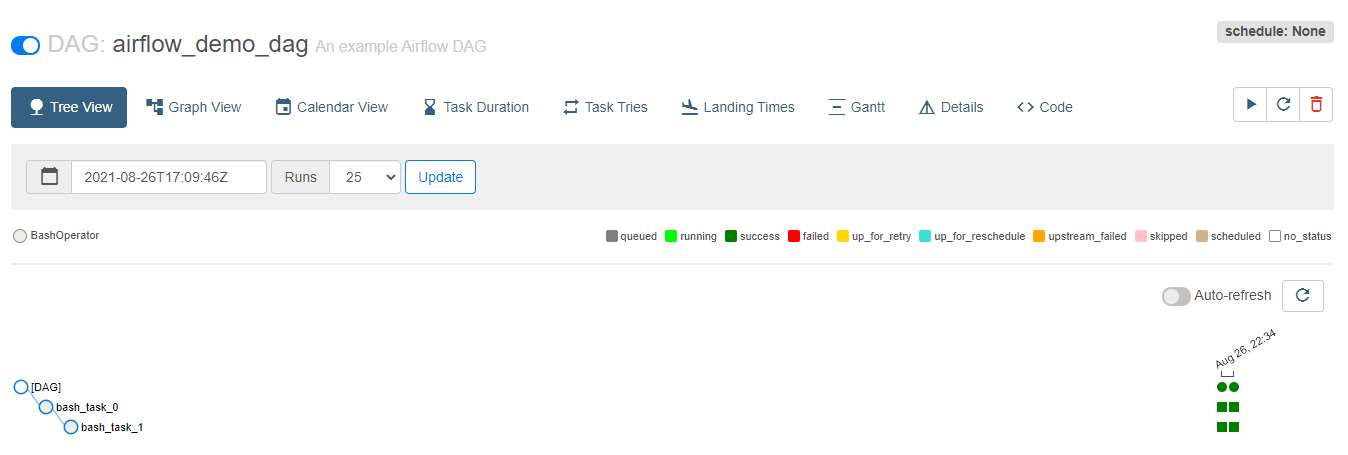